# Artificial Neural Networks: Example of use of a Multilayer Perceptron

For this example, we will use the already known dataset about USA housing. This is the real estate problem, and our goal is to help the real estate agent predict housing prices for regions in the USA.

We have used Linear Regression in this context; now, we are going to try Artificial Neural Networks. Let's try using Multilayer Perceptrons.

### The data

It will be used data frame with 5000 observations on the following 7 variables:

* **Avg. Area Income** - Avg. Income of residents of the city house is located in.
* **Avg. Area House Age** - Avg Age of Houses in same city
* **Avg. Area Number of Rooms** - Avg Number of Rooms for Houses in same city
* **Avg. Area Number of Bedrooms** - Avg Number of Bedrooms for Houses in same city
* **Area Population** - Population of city house is located in
* **Price** - Price that the house sold at
* **Address** - Address for the house

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the data

Create the data frame

In [3]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [4]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


Since the feature <em>Address</em> is the one categoric and not needed for the purpose of the exercise, let's drop it:

In [5]:
USAhousing.drop('Address',axis=1,inplace=True)

In [6]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [7]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## EDA

Create the histogram of the target - column <em>Price</em>:

<Axes: xlabel='Price', ylabel='Count'>

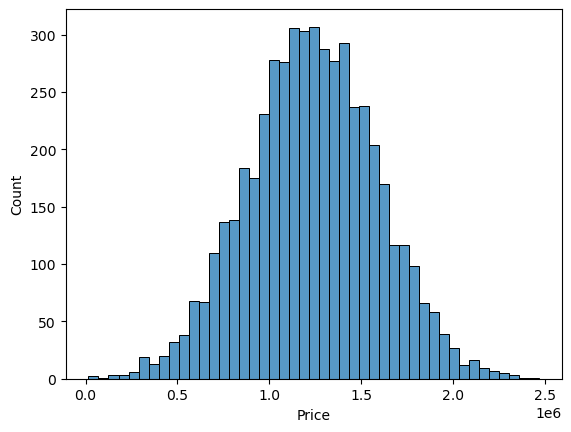

In [8]:
sns.histplot(USAhousing['Price'])

Create a heatmap of the features:

<Axes: >

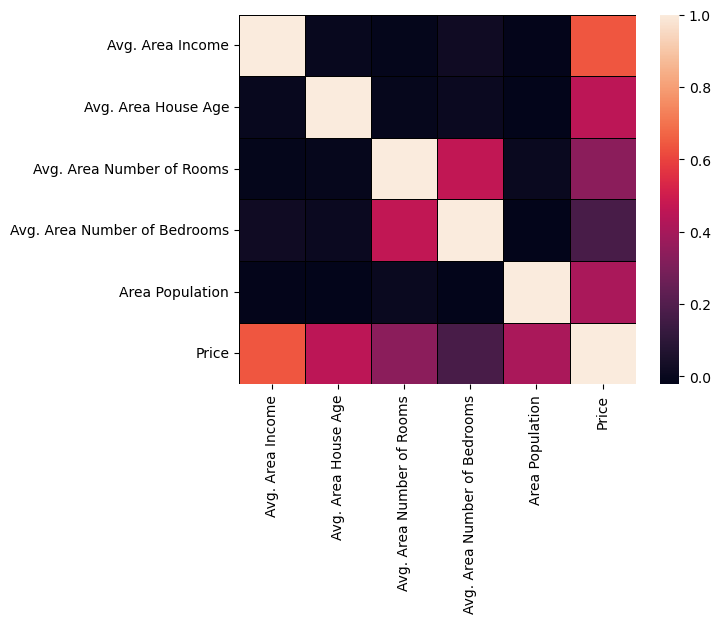

In [9]:
housing = USAhousing.corr(method='pearson')
sns.heatmap(housing,linecolor='black',linewidths=0.5)

Create a pairplot to visualize relations:

c:\Users\joaop\miniconda3\envs\mypython3version\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


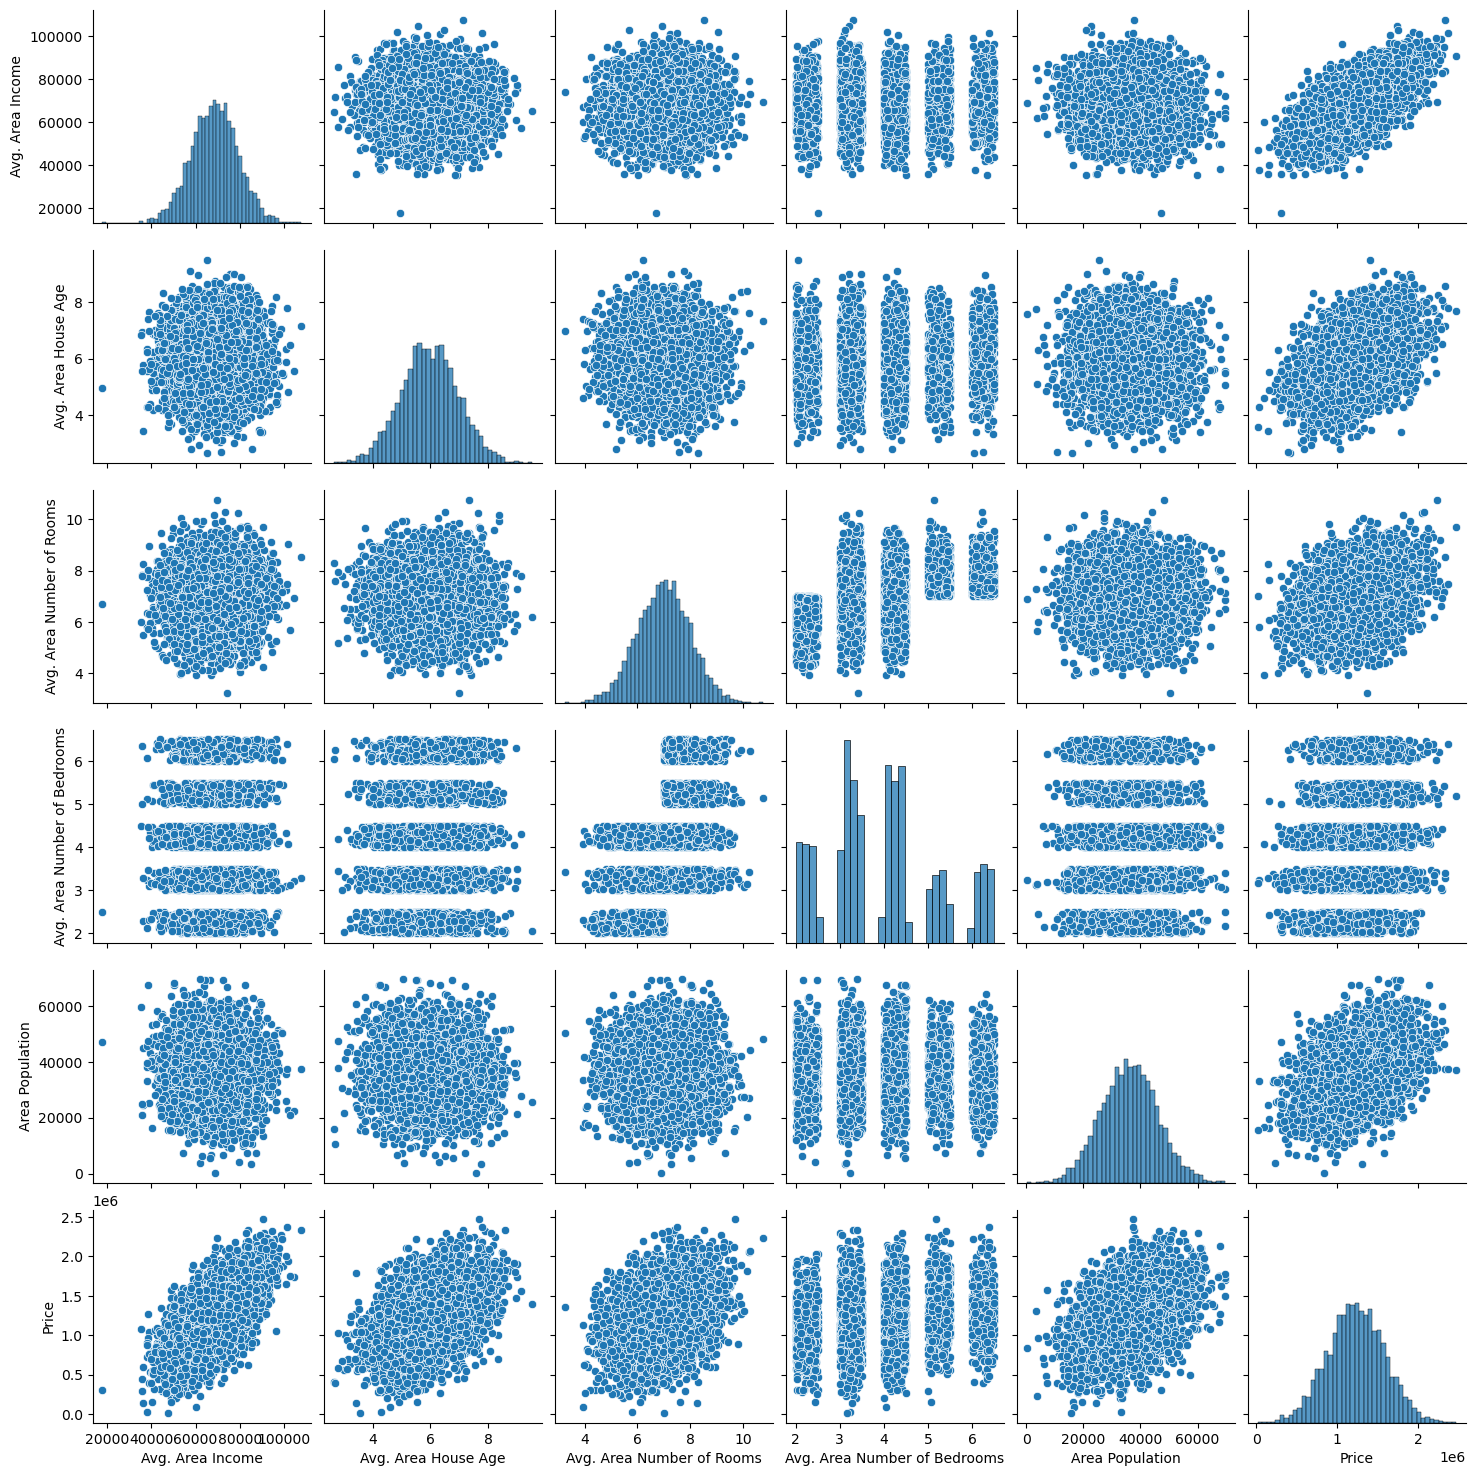

In [10]:
sns.pairplot(USAhousing)

## Train Test Split

Define <em>X</em> and <em>Y</em>:

In [10]:
x = USAhousing.drop('Price',axis=1)
y = USAhousing[['Price']]

Divide the subsets of test and training data:

In [11]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

In [12]:
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2023)

## Artificial Neural Network (under the form of a MLP)

Install <em>tensorflow</em> if needed: <code>pip install tensorflow</code>

Install <em>keras</em> if needed: <code>pip install --upgrade keras</code>

Install <em>scikeras</em> if needed: <code>pip install scikeras[tensorflow]</code>

### Import more libraries

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor#, KerasClassifier

In [15]:
print("TensorFlow version:",tf.__version__)

TensorFlow version: 2.10.0


### Structure the MLP

Define a model with:
- <em>ReLu</em> as activation function
- sequential topology
- three layers
- <em>MAE</em> as loss function
- <em>Adam</em> as optimizer
- learning rate of <em>0.01</em>
- <em>MAE</em> and <em>MSE</em> as metrics

In [16]:
def build_model(activation='relu',learning_rate=0.01):
    model = Sequential()
    model.add(Dense(16,input_dim= 5,activation=activation))
    model.add(Dense(8,activation=activation))
    model.add(Dense(1,activation=activation))

    # Compile the model
    model.compile(
        loss='mae',
        optimizer=tf.optimizers.Adam(learning_rate),
        metrics=['mae','mse'])
    return model

Build the model:

In [17]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


We will use <em>GridSearchCV</em> to tune the model

### GridSearchCV

Define the grid parameters using a dictionary:

In [18]:
optimizer = ['SGD','RMSprop','Adagrad']
param_grid = dict(optimizer=optimizer)

Define a <em>KFold</em> with <em>5 splits</em>, <em>shuffle</em> and a <em>random state</em>:

In [19]:
kf = KFold(n_splits=5,shuffle=True,random_state=2021)

Use a <em>KerasRegressor</em> with a <em>batch size</em> of <em>32</em>, <em>validation split</em> of <em>0.2</em> and <em>20 epochs</em>:

In [20]:
model = KerasRegressor(model = build_model,batch_size=32,validation_split=0.2,epochs=20)

Compute a <em>GridSearchCV</em> with <em>NegMAE scoring</em>, <em>refit</em> and a <em>verbose</em> of <em>1</em>:

In [21]:
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=kf,scoring='neg_mean_absolute_error',refit='True',verbose=1)

Fit the model:

In [23]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Epoch 1/20
80/80 [==============================] - 1s 8ms/step - loss: 1233263.8750 - mae: 1233263.8750 - mse: 1644523683840.0000 - val_loss: 1213675.3750 - val_mae: 1213675.3750 - val_mse: 1597562683392.0000
Epoch 2/20
80/80 [==============================] - 0s 5ms/step - loss: 1233263.7500 - mae: 1233263.7500 - mse: 1644523683840.0000 - val_loss: 1213675.3750 - val_mae: 1213675.3750 - val_mse: 1597562683392.0000
Epoch 3/20
80/80 [==============================] - 0s 4ms/step - loss: 1233263.7500 - mae: 1233263.7500 - mse: 1644523945984.0000 - val_loss: 1213675.3750 - val_mae: 1213675.3750 - val_mse: 1597562683392.0000
Epoch 4/20
80/80 [==============================] - 0s 4ms/step - loss: 1233263.7500 - mae: 1233263.7500 - mse: 1644524208128.0000 - val_loss: 1213675.3750 - val_mae: 1213675.3750 - val_mse: 1597562683392.0000
Epoch 5/20
80/80 [==============================] - 0s 4ms/step - loss: 1233264.0000 - mae: 1233264.

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=KerasRegressor(batch_size=32, epochs=20, model=<function build_model at 0x0000022B5252DC60>, validation_split=0.2),
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             refit='True', scoring='neg_mean_absolute_error', verbose=1)

#### Best results

Find the <em>best score</em> and the <em>best params</em>:

In [24]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))

Best: -201599.759242 using {'optimizer': 'RMSprop'}


Find the <em>mean test score</em>, <em>std test score</em> and <em>params</em> for each search:

In [25]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

In [26]:
for mean, stdev, param in zip(means,stds,params):
    print("%f (%f) with: %r" % (mean,stdev,param))

-409423.854040 (416080.357193) with: {'optimizer': 'SGD'}
-201599.759242 (4307.779308) with: {'optimizer': 'RMSprop'}
-617947.843216 (506230.968568) with: {'optimizer': 'Adagrad'}


Find the best model:

In [27]:
best_mlp_model = grid_search.best_estimator_
print(best_mlp_model)

KerasRegressor(
	model=<function build_model at 0x0000022B5252DC60>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=RMSprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
)


### Use the best model

Fit the best model:

In [28]:
best_mlp_model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test),verbose=1)

Epoch 1/20
125/125 [==============================] - 1s 5ms/step - loss: 437389.2812 - mae: 437389.2812 - mse: 372534509568.0000 - val_loss: 197236.8438 - val_mae: 197236.8438 - val_mse: 61691076608.0000
Epoch 2/20
125/125 [==============================] - 0s 3ms/step - loss: 204041.4375 - mae: 204041.4375 - mse: 65022369792.0000 - val_loss: 196473.0469 - val_mae: 196473.0469 - val_mse: 60493688832.0000
Epoch 3/20
125/125 [==============================] - 0s 3ms/step - loss: 204021.1406 - mae: 204021.1406 - mse: 64701435904.0000 - val_loss: 196703.7969 - val_mae: 196703.7969 - val_mse: 60317380608.0000
Epoch 4/20
125/125 [==============================] - 0s 4ms/step - loss: 202967.5469 - mae: 202967.5469 - mse: 63825719296.0000 - val_loss: 198815.7969 - val_mae: 198815.7969 - val_mse: 61455863808.0000
Epoch 5/20
125/125 [==============================] - 0s 3ms/step - loss: 202696.5312 - mae: 202696.5312 - mse: 63779581952.0000 - val_loss: 201650.8906 - val_mae: 201650.8906 - val_m

KerasRegressor(
	model=<function build_model at 0x0000022B5252DC60>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=RMSprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
)

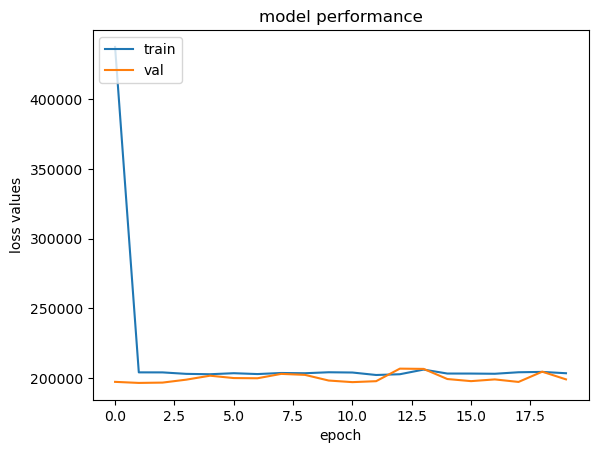

In [29]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

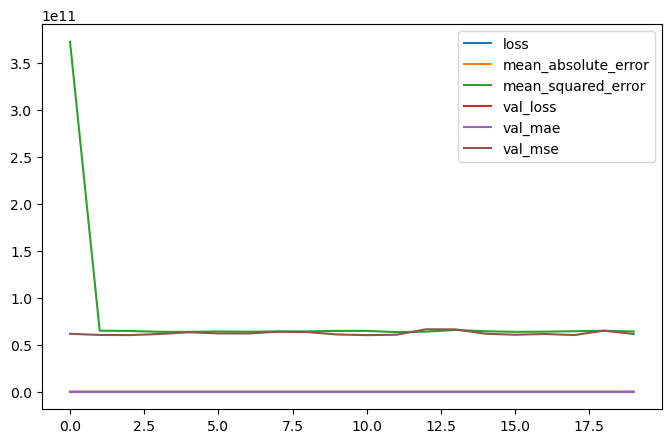

In [30]:
pd.DataFrame(best_mlp_model.history_).plot(figsize=(8,5))
plt.show()

### Predictions

Obtain the predictions:

In [31]:
predictions = best_mlp_model.predict(x_test)

32/32 [==============================] - 0s 2ms/step


Print the first five:

In [38]:
print(predictions[:5])

[[1345331.5]
 [1324745.5]
 [1171588.9]
 [1293027.9]
 [1141204. ]]


### Evaluate the model

In [39]:
from sklearn import metrics

Assess by MAE, MSE and RMSE:

In [40]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',metrics.mean_squared_error(y_test,predictions))

MAE: 199020.14794129503
MSE: 61510970716.937515
RMSE: 61510970716.937515


Scatter the real values with the predictions:

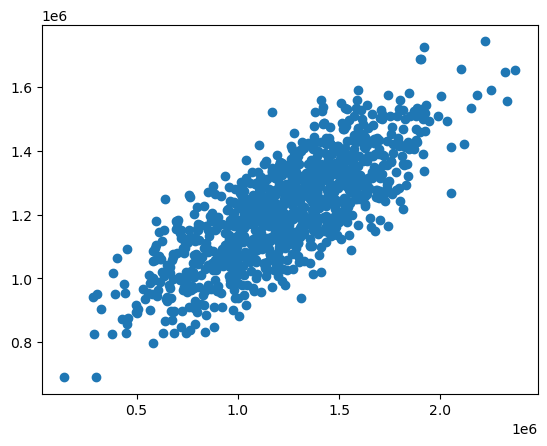

In [41]:
plt.scatter(y_test,predictions)

Create a visualization of the actual and predicted results. Limit it to 200 comparisons:

In [44]:
def real_predicted_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(y_test[:limit],color='green',label='Actual')
    plt.plot(predictions[:limit],color='red',label='Predicted')
    plt.grid(alpha=0.3)
    plt.xlabel('Houses')
    plt.ylabel('Price')
    plt.title('Real vs Predicted')
    plt.legend()
    plt.show()

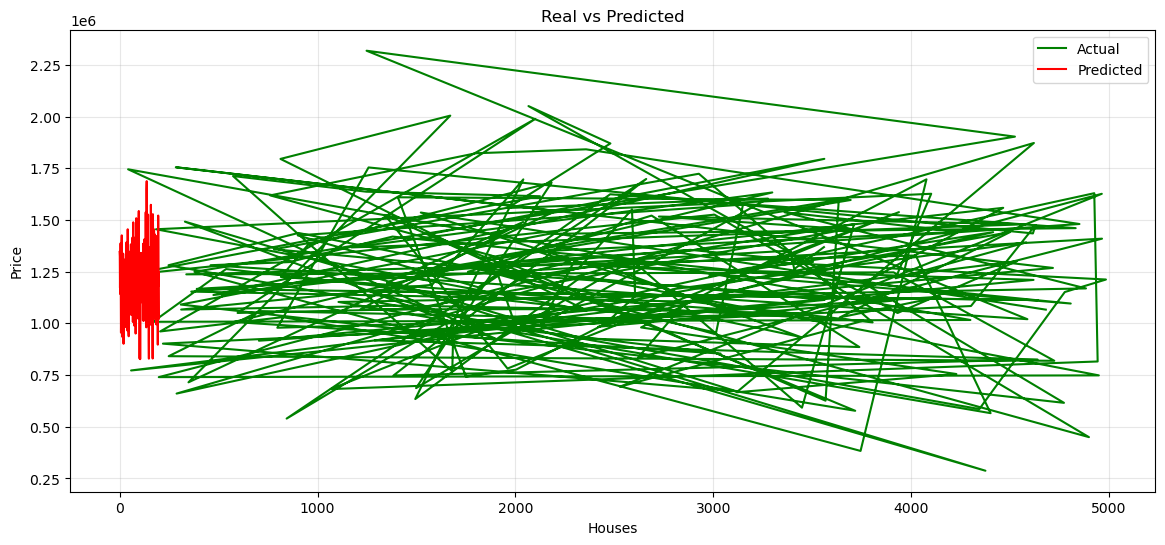

In [45]:
real_predicted_viz(200)

# Data scaling

**Data scaling** or **normalization** is a process of making model data in a standard format so that the training is improved, accurate, and faster.

In [46]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


Artificial neural networks are "picky" - they prefer scaled data!
Therefore, and since our data have a large variation of values, let's scale the data to be in the interval between [0, 1]:

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler_x = MinMaxScaler(feature_range=(0,1)).fit(x)
scaler_y = MinMaxScaler(feature_range=(0,1)).fit(y)
x_scaled = pd.DataFrame(scaler_x.transform(x[x.columns]), columns=x.columns)
y_scaled = pd.DataFrame(scaler_y.transform(y[y.columns]), columns=y.columns)

Visualize the head of <em>X</em>:

In [50]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


And now scaled:

In [51]:
x_scaled.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,0.686822,0.441986,0.501502,0.464444,0.329942
1,0.683521,0.488538,0.464501,0.242222,0.575968
2,0.483737,0.468609,0.701350,0.695556,0.528582
3,0.506630,0.660956,0.312430,0.280000,0.491549
4,0.469223,0.348556,0.611851,0.495556,0.376988


Visualize the head of <em>y</em>:

In [52]:
y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


And now scaled:

In [53]:
y_scaled.head()

,Price
0,0.425210
1,0.607369
2,0.425192
3,0.507384
4,0.250702


## Train Test Split

Divide the subsets of test and training data:

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y_scaled,test_size=0.2,random_state=2021)

## MLP

Build the model:

In [55]:
model = build_model()
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 16)                96        
                                                                 
 dense_55 (Dense)            (None, 8)                 136       
                                                                 
 dense_56 (Dense)            (None, 1)                 9         
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [56]:
model = KerasRegressor(model=build_model, batch_size=32, validation_split=0.2,epochs=20)

In [ ]:
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=kf,scoring='neg_mean_absolute_error',refit=True,verbose=1)

#### Best results

Find the <em>best score</em> and the <em>best params</em>:

Find the <em>mean test score</em>, <em>std test score</em> and <em>params</em> for each search:

Find the best model:

### Use the best model

Fit the best model:

### Predictions

Obtain the predictions:

Print the first five:

Unscale the predictions to see the real prices:

Print the first five:

Unscale <em>y_test</em> to get the original values:

Print the first five:

### Evaluate the model

Assess by MAE, MSE and RMSE:

Scatter the real values with the predictions:

Create a visualization of the actual and predicted results. Limit it to 200 comparisons:

##
#### Compare the results with the ones obtained with the Linear Regression model created in class 4.

#### **Which model performed better?**